## Process terminus delineation results for all glaciers in one batch of analysis

By Jukes Liu. _Last modified 02-15-2020._

### Import necessary packages and functions

In [45]:
import numpy as np
import os
import pandas as pd    
import scipy.stats
import datetime
import math
import shutil
import subprocess
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
os.chdir('/home/jukes/automated-glacier-terminus')
from automated_terminus_functions import calc_changerates1, to_datetimes, within, remove_dips, remove_jumps

csvpaths = '/home/jukes/Documents/Sample_glaciers/'
basepath = '/media/jukes/jukes1/LS8aws/'
massorsize = "mass"

### Read in data from csv files

In [46]:
#IMAGE DATES
datetime_df = pd.read_csv(csvpaths+'imgdates.csv', sep=',', dtype=str, header=0, names=['Scene', 'datetimes'])
print(datetime_df.shape)

(864, 2)


In [47]:
# analysis_date = str(datetime.datetime.now())[0:10]
# analysis_date.replace('-', '_'); print(analysis_date)
analysis_date = '2020_04_21'
#DELINEATION METRIC AND ORDER 
for file in os.listdir(csvpaths):
    if analysis_date in file and file.endswith('.csv'):
        print('found'); thefile = file
order_df = pd.read_csv(csvpaths+thefile, sep=',', dtype=str, header=1, usecols=[0,1,2,3,4])
order_df = order_df.dropna()

found


In [48]:
order_df.head()

,BoxID,Scene,Scale,Metric,Order
1,001,LC80310052015069LGN00,004,120.5696153641,5
2,001,LC80310052015069LGN00,003,231.4087166786,4
3,001,LC80310052015069LGN00,002,442.5237731934,3
4,001,LC80310052015069LGN00,001,909.6063442230,2
5,001,LC80310052015069LGN00,000,1823.4684123993,1


In [49]:
#CENTERLINE INFO
centerline_df = pd.read_csv(csvpaths+'Boxes_coords_pathrows.csv', sep=',', dtype=str, header=0)
centerline_df = centerline_df.set_index('BoxID')

In [50]:
#GLACIER VELOCITIES
flowspeed_df= pd.read_csv(csvpaths+'Glacier_vel_measures.csv', sep=',', dtype=str)
flowspeed_df = flowspeed_df.set_index('BoxID')

### Grab BoxIDs of all glaciers analyzed:

In [56]:
BoxIDs = list(set(order_df.BoxID))

In [57]:
print(BoxIDs)

['174', '002', '190', '152', '277', '213', '191', '531', '235', '194', '193', '195', '033', '001', '150', '147', '192', '214', '120', '259', '148', '004']


In [54]:
BoxIDs = BoxIDs[6:]
BoxIDs

['191',
 '531',
 '235',
 '194',
 '193',
 '195',
 '033',
 '001',
 '150',
 '147',
 '192',
 '214',
 '120',
 '259',
 '148',
 '004']

### Run analysis of results for each glacier in a loop:

Box191


/home/jukes/automated-glacier-terminus/automated_terminus_functions.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['changerate'] = tchange


[98, 99, 100, 101, 102, 104, 105, 106, 107, 108]
[]
[]
[65, 66]
[]
[]
[49]
[]
[]
[31, 74, 75, 87, 87, 89, 90, 91]
[20, 21, 22, 23, 24, 84, 86, 87, 88, 90, 91]
[51, 52, 53, 54, 78, 80, 80, 81, 81, 82, 82, 92]
[74]
[20, 21, 22, 23, 59, 60, 77, 78, 79, 86, 86]
[20, 21, 22, 23, 24]
25
26
20
25
26
20
25
26
20


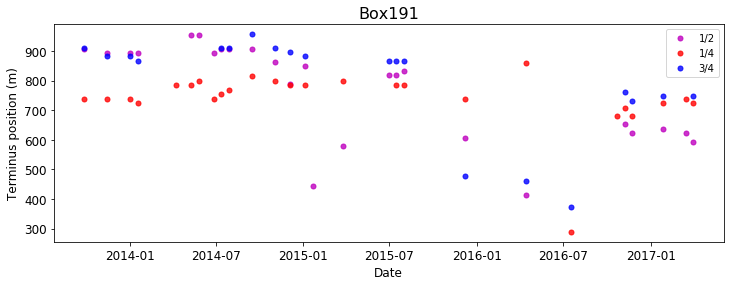

Box531


/home/jukes/automated-glacier-terminus/automated_terminus_functions.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['changerate'] = tchange


[5, 11, 12, 13, 14, 20, 20, 21, 21, 22, 22, 23, 23, 29, 29, 30, 30, 31, 31, 32, 32, 34, 51, 51, 63, 63, 64, 64, 74, 75, 76, 77]
[11, 12, 13, 14, 19, 19, 36, 48, 49, 50]
[10]
[5, 6, 7, 8, 14, 15, 42, 54, 55, 56, 57, 58, 73, 79, 80, 86, 86, 87, 87, 88, 93, 98]
[63, 65, 65, 71, 72]
[65, 66, 67, 68]
[4, 5, 6]
[]
[]
[14, 22, 23, 26, 27, 28, 29, 30, 31, 32, 33, 40]
[29]
[3, 12, 13, 14, 15, 16, 19, 20, 21, 22, 23, 26, 38, 39, 43, 44, 45, 46, 56, 57, 58, 59, 61, 62, 63, 64, 70]
[38, 39]
[3, 11, 12, 13, 14, 15]
[4, 9, 10, 11, 12]
12
18
3
12
18
3
12
18
3


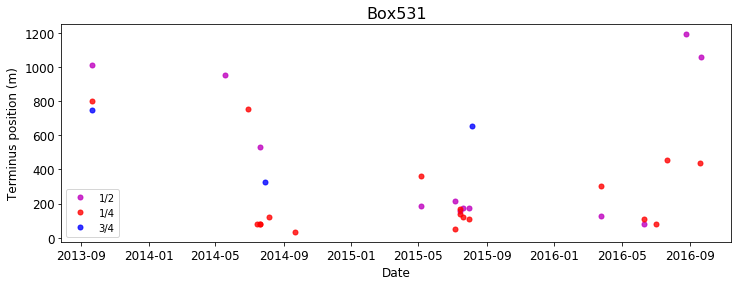

Box235


/home/jukes/automated-glacier-terminus/automated_terminus_functions.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['changerate'] = tchange


[11, 12, 30, 31, 32, 33, 49, 64, 65, 66, 67, 68, 73, 74, 75, 76, 77, 79, 98, 139, 140, 141, 142, 159, 162, 162, 168, 170, 172, 173, 174, 175, 179, 180, 181, 182, 190, 190, 193, 200, 236, 237, 237, 238, 239, 240, 247, 248, 249, 256, 258, 259, 260, 262, 263, 264, 279, 280, 281, 282, 283, 289, 290, 294, 294, 295, 295, 296, 296, 297, 297, 298, 298, 300, 301, 302, 303, 304, 310, 311, 312, 313, 314]
[47, 48, 49, 50, 51, 115, 116, 117, 118, 119, 132, 133, 134, 135, 148, 149, 150, 151, 152, 205, 207, 208, 209, 211, 212, 222, 234]
[122, 122, 123, 123]
[36, 52, 60, 61, 67, 81, 81, 87, 130, 130, 133, 133, 137, 138, 154, 191, 191, 200, 201, 202, 208, 227, 228, 232, 233, 234, 235, 236, 238, 239, 240, 241, 242]
[31, 32, 33, 34, 35, 40, 41, 42, 43, 44, 53, 53, 54, 54, 55, 55, 56, 56, 57, 57, 120, 121, 122, 188, 189, 190, 191]
[43, 44, 45, 105, 106, 170, 171, 172]
[10, 11, 12, 33, 34, 35, 36, 37, 49, 62, 63, 64, 65, 66, 71, 72, 73, 74, 75, 96, 97, 98, 99, 100, 114, 115, 141, 142, 143, 144, 145, 161, 1

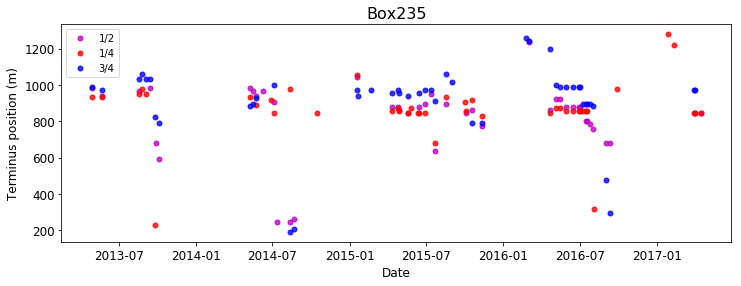

Box194
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
0
0
0


ValueError: You are trying to merge on float64 and object columns. If you wish to proceed you should use pd.concat

In [55]:
for BOI in BoxIDs:
    print("Box"+BOI)
    metric = "Datfiles/"; imagepath = basepath+"Box"+BOI+"/rotated/"
    
    order_box_df = order_df[order_df["BoxID"]==BOI].copy()
    order_box_df = order_box_df.drop('BoxID', axis=1)
    order_box_df = order_box_df.dropna()
    
    #GRAB INFO FROM IMAGE FILES
    image_arrays = []; dats = []; trimdats = []; imgnames = []; boxids = []; scales = []
    imgfiles = os.listdir(imagepath)
    for imgfile in imgfiles:
        #grab image files and append to images list
        if imgfile.endswith(BOI+".png"):
            image = mpimg.imread(imagepath+imgfile); imgname = imgfile[0:-4]; scenename = imgname[2:23]
            pathtodat = imagepath+imgname+".pgm_max_gaussian/"+metric
            datfiles = os.listdir(pathtodat)
            #if there are datfiles, grab the trimmed and non-trimmed files
            if len(datfiles) > 1: 
                #find the trimmed dat file and the original
                for dat in datfiles:
                    if "trim" in dat:
                        datfile_trim = dat
                        #append to trimmed dats list
                        trimdats.append(datfile_trim)
                        #grab the scale and append the equivalent original dat
                        scale = dat[-7:-4]
                        datfile = "terminus_"+scale+".dat"
                        dats.append(datfile)
                        #append the image array and the image name to the list
                        image_arrays.append(image); imgnames.append(scenename); boxids.append(BOI); scales.append(scale)
    images_df = pd.DataFrame(list(zip(imgnames, boxids, image_arrays, dats, trimdats, scales)),
                  columns=['Scene','BoxID','Image_array', 'Dat_filename', "Trimmed_dat_filename", "Scale"])
    images_df.sort_values(by='Scene'); datetime_df = datetime_df.sort_values(by='Scene')
    
    #MERGE IMAGE INFO WITH IMAGEDATES AND MERGE WITH ORDER
    new_df = images_df.merge(datetime_df, how= 'inner', on = 'Scene')
    dated_images_df = new_df.sort_values(by='datetimes', ascending = True)
    final_images_df = dated_images_df.merge(order_box_df, how='inner', on=['Scene', 'Scale'])
    final_images_df = final_images_df.sort_values(by=['datetimes','Scene','Order'], ascending=True)
    
    #CALCULATE TERMINUS POSITIONS
    #LOAD IN REFERENCE POINTS to calculate terminus position with respect to
    box_midpoint_x = np.float(centerline_df.loc[BOI, 'lmid50_x']); box_midpoint_y = np.float(centerline_df.loc[BOI, 'lmid50_y'])
    boxmid_x_25 = np.float(centerline_df.loc[BOI, 'lmid25_x']); boxmid_y_25 = np.float(centerline_df.loc[BOI, 'lmid25_y'])
    boxmid_x_75 = np.float(centerline_df.loc[BOI, 'lmid75_x']); boxmid_y_75 = np.float(centerline_df.loc[BOI, 'lmid75_y'])

    #GRAB CENTERLINE POINTS
    #grab slopes and intercepts from the dataframe
    c_slope = float(centerline_df.loc[BOI]['m50']); c_intercept = float(centerline_df.loc[BOI]['b50']) 
    c25_slope = float(centerline_df.loc[BOI]['m25']); c25_intercept = float(centerline_df.loc[BOI]['b25'])
    c75_slope = float(centerline_df.loc[BOI]['m75']); c75_intercept = float(centerline_df.loc[BOI]['b75'])  

    #grab range of x-values
    xmin50 = float(box_midpoint_x); xmax50 = float(centerline_df.loc[BOI, 'rmid50_x']); ymid50 = float(box_midpoint_y)
    xmin25 = float(boxmid_x_25); xmax25 = float(centerline_df.loc[BOI, 'rmid25_x']); ymid25 = float(boxmid_y_25)
    xmin75 = float(boxmid_x_75); xmax75 = float(centerline_df.loc[BOI, 'lmid75_x']); ymid75 = float(boxmid_y_75)
    xmax = np.max([xmax50, xmax25, xmax75]); xmin = np.min([xmin50, xmin25, xmin75]); c_x = np.linspace(xmin, xmax, int(xmax-xmin)*2)

    #calculate y-values using the various centerlines
    c_y = c_slope*c_x + c_intercept; c_y_25 = c25_slope*c_x + c25_intercept; c_y_75 = c75_slope*c_x + c75_intercept

    #LISTS TO HOLD TERMINUS POSITIONS AND INTERSECTION POINTS
    terminus_positions = []; tpositions_25 = []; tpositions_75 = []
    intersections = []; X25 = []; X75 = []

    #for each scene and scale:
    for index, row in final_images_df.iterrows():
        trimdat = row['Trimmed_dat_filename']; dat = row['Dat_filename']; scene = row['Scene']    
        #CALCULATE TERMINUS POSITION
        #load in dat files and calculate intersection points
        datpath = imagepath+"R_"+scene+"_B8_PS_Buffer"+BOI+".pgm_max_gaussian/"+metric
    #     term_trimdat = np.loadtxt(datpath+trimdat)
        term_dat = np.loadtxt(datpath+dat)                          
        intersect_xs = []; intersect_xs_25 = []; intersect_xs_75 = []
        intersect_ys = []; intersect_ys_25 = []; intersect_ys_75 = []

        #loop through all the x,y values for the centerline
        for j in range(0, len(c_x)):
            x = c_x[j]; y = c_y[j]; y25 = c_y_25[j]; y75 = c_y_75[j]        
            interval = 0.6
            #where are the intersections with the terminus pick?
    #         for dat_x, dat_y in term_trimdat:
            for dat_x, dat_y in term_dat:
                #midway centerline
                if within(dat_x, x, interval) and within (dat_y, y, interval):
                    #intersect_x = dat_x; intersect_y = dat_y; intersect_found = True
                    intersect_xs.append(dat_x); intersect_ys.append(dat_y)            
                #1/4th centerline
                if within(dat_x, x, interval) and within (dat_y, y25, interval):
                    intersect_xs_25.append(dat_x); intersect_ys_25.append(dat_y)              
                #3/4th centerline
                if within(dat_x, x, interval) and within (dat_y, y75, interval):
                    intersect_xs_75.append(dat_x); intersect_ys_75.append(dat_y)
        #for 50 centerline
        #if no intersections are found with the terminus line, append Nans
        if len(intersect_xs) == 0:
            tpos50 = np.NaN; intersect_x = np.NaN; intersect_y = np.NaN
        #if at least one is found:
        else:
            #intersection with the greatest x
            #use distance formula to calculate distance between
            max_index = intersect_xs.index(np.max(intersect_xs))
            intersect_x = intersect_xs[max_index]; intersect_y = intersect_ys[max_index]
    #         term_position = distance(xmin50, ymid50, intersect_x, intersect_y)*15.0
            tpos50 = (intersect_x-xmin50)*15.0
    #         print(tpos50)

        #for 25 centerline
        if len(intersect_xs_25) == 0:
            tpos25 = np.NaN; intersect_x25 = np.NaN; intersect_y25 = np.NaN
        else:
            max_index_25 = intersect_xs_25.index(np.max(intersect_xs_25))
            intersect_x25 = intersect_xs_25[max_index_25]; intersect_y25 = intersect_ys_25[max_index_25]
            tpos25 = (intersect_x25-xmin25)*15.0
    #         tpos25 = distance(xmin25, ymid25, intersect_x25, intersect_y25)*15.0

        #for 75 centerline
        if len(intersect_xs_75) == 0:
            tpos75 = np.NaN; intersect_x75 = np.NaN; intersect_y75 = np.NaN
        else:
            max_index_75 = intersect_xs_75.index(np.max(intersect_xs_75))
            intersect_x75 = intersect_xs_75[max_index_75]; intersect_y75 = intersect_ys_75[max_index_75]
            tpos75 = (intersect_x75-xmin75)*15.0
    #         tpos75 = distance(xmin75, ymid75, intersect_x75, intersect_y75)*15.0

        #append to lists
        terminus_positions.append(tpos50); tpositions_25.append(tpos25); tpositions_75.append(tpos75)
        intersections.append([intersect_x, intersect_y]); X25.append([intersect_x25, intersect_y25]); X75.append([intersect_x75, intersect_y75])

    # ADD TERMINUS POSITION AND INTERSECTIONS
    final_images_df['tpos50'] = terminus_positions; final_images_df['tpos25'] = tpositions_25; final_images_df['tpos75'] = tpositions_75
    final_images_df['X50'] = intersections ;final_images_df['X25'] = X25; final_images_df['X75'] = X75
    
    #SPLIT INTO 3 DATAFRAMES FOR 3 FLOWLINES:
    final_images_50 = final_images_df[['Scene', 'BoxID', 'Scale', 'datetimes', 'Metric', 'Order', 
                                      'tpos50', 'X50',]].copy().reset_index(drop=True)
    final_images_50 = final_images_50.rename(columns={"tpos50": "tpos", "X50": "X"})
    final_images_25 = final_images_df[['Scene', 'BoxID', 'Scale', 'datetimes', 'Metric', 'Order', 
                                      'tpos25', 'X25']].copy().reset_index(drop=True)
    final_images_25 = final_images_25.rename(columns={"tpos25": "tpos", "X25": "X"})
    final_images_75 = final_images_df[['Scene', 'BoxID', 'Scale', 'datetimes', 'Metric', 'Order', 
                                      'tpos75', 'X75']].copy().reset_index(drop=True)
    final_images_75 = final_images_75.rename(columns={"tpos75": "tpos", "X75": "X"})
    dfs = [final_images_50, final_images_25, final_images_75]
    
    #CALCULATE TERMINUS CHANGE RATES
    dfs_new = []
    for df in dfs: 
        to_datetimes(df); dfs_new.append(calc_changerates1(df))
        
    #FILTER USING 5*MAXIMUM FLOW SPEEDS
    max_flow = float(flowspeed_df['Max_speed'][BOI])
    if max_flow < 1.0:
        flow_thresh = 5.0
    else:
        flow_thresh = 5.0*max_flow
    #remove dips
    N1 = 3; nodips = []
    for df in dfs_new:
        nodips.append(remove_dips(df, flow_thresh, N1))
    #remove jumps
    N2 = 2; nojumps = []
    for df in nodips:
        nojumps.append(remove_jumps(df, flow_thresh, N2))
        
    #GRAB HIGHEST ORDER PICK AFTER FILTERING
    highestorder_dfs = []
    for df in nojumps:
        #grab unique dates
        unique_dates = set(list(df['datetimes']))
        print(len(unique_dates))
        #grab highest orders:
        order_list = []
        for date in unique_dates:
            date_df = df[df['datetimes'] == date].copy()
            highestorder = np.min(np.array(date_df['Order']))
            order_list.append(highestorder)
        highestorder_df = pd.DataFrame(list(zip(unique_dates, order_list)), columns=['datetimes', 'Order']).sort_values(by='datetimes', ascending=True)
        highestorder_dfs.append(highestorder_df)
    
    onepick_dfs = []
    for i in range(0, len(highestorder_dfs)):
        onepick_df = nojumps[i].merge(highestorder_dfs[i], how='inner', on=['datetimes', 'Order'])
        onepick_dfs.append(onepick_df)
        print(onepick_df.shape[0])
    
    #PLOT AND SAVE
    fig, ax1 = plt.subplots(figsize=(12,4))
    markers = ['mo', 'ro', 'bo']
    for j in range(0, len(onepick_dfs)):
        df = onepick_dfs[j];    print(len(df))
        ax1.plot(df['datetimes'], df['tpos'], markers[j], markersize=5, alpha=0.8)
    #general plot parameters
    ax1.set_ylabel('Terminus position (m)', color='k', fontsize=12)
    ax1.set_title("Box"+BOI, fontsize=16); ax1.set_xlabel('Date', fontsize=12)
    ax1.tick_params(axis='both', which='major', labelsize=12)
    #save figure
    plt.savefig(csvpaths+"/Figures/Termposition_LS8_m_Box"+BOI+"_"+analysis_date+".png", dpi=200)
    plt.legend(['1/2', '1/4', '3/4'])
    plt.show()
    
    flowlines = ['flowline50', 'flowline25', 'flowline75']
    for k in range(0, len(onepick_dfs)):
        df = onepick_dfs[k];
        df.to_csv(path_or_buf = csvpaths+'Tpos_Box'+BOI+'_'+flowlines[k]+'_filtered.csv', sep=',')